

# Information on the numpy.random package
 Reference; NumPy v1.21 Manual: https://numpy.org/doc/stable/reference/random/index.html [1]

![This is an image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/512px-NumPy_logo_2020.svg.png)
<br>



## **The overall purpose of the package**
***

   Numpy.random is a sub package of the Numpy Library. There are two combinations **Bit Generator** and **Generator**. This notebook will mainly focus on **Generator**. The package is used for generating sample random numerical data, shuffles existing data and draws samples based on a specified distribution. <br>

I will be running through the following functions of numpy.random;<br> 
   - Simple random data 
   - Permutations 
   - A selection of Distributions
   - Seed function <br>

## **Simple random data**
***

Simple random data consists of the following; 

- *integers* 
- *random*
- *choice*
- *bytes*
<br>

Lets start with **integers**; returns random integers from low(incusive) to high (exclusive) or if endpoint=true, low (inclusive to high (inclusive).[1] 

In [1]:
# Importing libraries 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# creating a varible 
rng = np.random.default_rng() # random generator
#creating varible (x), inputting arguement(10)
x = rng.integers(6, size=10) # generates an array size of 10 between 0-6 but not including 6
print("Output:",x) 

Output: [1 2 3 3 3 1 0 0 3 4]


                Visualization using a histogram            

Text(0.5, 1.0, 'Sample data (1)')

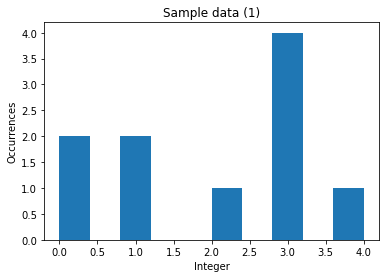

In [3]:
plt.hist (x)
plt.xlabel('Integer')
plt.ylabel('Occurrences')
plt.title ('Sample data (1)')

Output: [83 98  3 ... 25 23 17]


Text(0.5, 1.0, 'Sample data (2)')

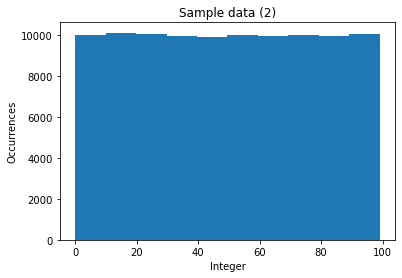

In [4]:
x = rng.integers(100, size=100000) # generates an array size of 100 between 0-100 but not including 100
print("Output:",x) 
#histogram
plt.hist (x)
plt.xlabel('Integer')
plt.ylabel('Occurrences')
plt.title ('Sample data (2)')

When using the integar function, as you can see it outputs a random number from low(inclusive) to high(exclusive).In the above examples I have input the argument of both 6 and 100 also changing the array on each histogram to show a clear comparison that when you are working with larger volumns of data, the integar function outputs are most likely to generate numbers with the same probability.<br>

*Generating more than one array with upper and lower bounds* [2]
***

In [5]:
x = rng.integers(6, size=(3, 2)) # 3 arrays to include 2 integers between 0-6 exclusive of 6
print("Output:",(x)) 

Output: [[1 2]
 [4 4]
 [4 3]]


Generate a 1 x 3 array with 3 different upper bounds

In [6]:
x = rng.integers(1, [3, 5, 10])
print("Output:",(x)) 

Output: [1 2 7]


Generate a 1 by 3 array with 3 different lower bounds

In [7]:
x = rng.integers([1, 5, 7], 10)
print("Output:",(x)) 

Output: [6 6 9]


Generate a 2 by 4 array using broadcasting with dtype of uint8

In [8]:
x = rng.integers([1, 3, 5, 7], [[10], [20]], dtype=np.uint8)
print("Output:",(x)) 

Output: [[ 9  4  6  7]
 [10  3 16 15]]


<br>

**Random**

Random return random floats in the half-open interval (0.0, 1.0).[2]

In [9]:
#creating variable rng for random generator 
rng = np.random.default_rng() # random generator 
rng.random() # outputs a random floating number

0.66670209187473

Passing an argument; to  generate two arrays, 5 rows , 1 column of random floating numbers   

In [10]:
rng.random ((2, 5, 1))

array([[[0.90582992],
        [0.01569402],
        [0.57796   ],
        [0.68541164],
        [0.9161202 ]],

       [[0.28987706],
        [0.37967547],
        [0.99318785],
        [0.70849216],
        [0.60333345]]])

Passing an argument; to generate two arrays, 5 rows , 1 column of random floating numbers from -5 to 0 [2]

In [11]:
 x = 5 * rng.random((2, 5, 1)) - 5

<br>

**Choice**

Choice generates a random sample from a give array whether it be uniform or non uniform. [2] This function picks a random value from a list of values. 

In [12]:
#uniform sample
rng = np.random.default_rng() # random generator 
rng.choice (5,3)#Generate a uniform random sample from np.arange(5) of size 3:

array([0, 4, 3], dtype=int64)

Setting probability - from the sample below you can see between 0-4 (using 5 as the argument)the integar 1 is not likely to be selected, integars 2 and 4 are less likely to be selected compared to that of 0 and 3. 

In [13]:
#non-uniform sample (p - must equal 1.0 as here we set the probability)
rng.choice(5,3, p=[0.3, 0, 0.1, 0.5, 0.1])#Generate a non-uniform random sample from np.arange(5) of size 3:

array([4, 4, 3], dtype=int64)

You can also use the choice function when using the following type of list; 

In [14]:
aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
rng.choice(aa_milne_arr, size= (3,3,3)) # printing list to include 3 columns, rows and sets 

array([[['Christopher', 'rabbit', 'Christopher'],
        ['piglet', 'pooh', 'rabbit'],
        ['piglet', 'rabbit', 'piglet']],

       [['pooh', 'rabbit', 'piglet'],
        ['rabbit', 'Christopher', 'piglet'],
        ['Christopher', 'pooh', 'pooh']],

       [['piglet', 'piglet', 'piglet'],
        ['Christopher', 'pooh', 'piglet'],
        ['rabbit', 'piglet', 'Christopher']]], dtype='<U11')

<br>

## Permutations

**Shuffle**
<br>
Modify an array or sequence in-place by shuffling its contents [2]

In [28]:
# shuffle intergar between 0-9
rng = np.random.default_rng() #random generator 
arr = np.arange(10) # value 10
rng.shuffle(arr) # shuffles array 
print ("Output:", arr)

Output: [7 1 3 4 2 0 6 8 5 9]


In [47]:
#Using reshape and axis 
arr = np.arange(9). reshape((3,3))
rng.shuffle(arr, axis = 1)
print ("Output:",arr)

Output: [[2 0 1]
 [5 3 4]
 [8 6 7]]


Above by using "reshape" provides you with an array, here an array of 3. When the "axis" is included this will display in order of integar array, i.e lowest integars will always appear within the first array. 

**Permutations**

Randomly permute a sequence, or return a permuted range.[2]


In [61]:
#sequence range 
rng = np.random.default_rng() #random generator 
p = rng.permutation(10) #array of 10 integars between 0-9 which are arranged in several possible ways when re-run
print ("Output:", p)

Output: [0 7 2 5 1 3 6 8 9 4]


In [63]:
#permuted range 
rng = np.random.default_rng() # random generator
p = rng.permutation([1, 2, 16, 5]) #array given 
print ("output:", p)

output: [ 5 16  1  2]


***

## References 

[2] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers 